In [176]:
import os
import pandas as pd
import csv 
import datetime
import numpy as np
import json
import matplotlib.pyplot as plt
import requests
import scipy.stats as st
import sys
import time

from statistics import mode

In [177]:
csvpath=os.path.join('VIXdata 2.csv')
csvpath 


'VIXdata 2.csv'

In [178]:
vix_df = pd.read_csv(csvpath)
vix_df= vix_df.reset_index()
vix_df = vix_df[(vix_df['level_0'] > '2016-01-01') & (vix_df['level_0'] <= '2021-08-09')]
vix_df.dropna()
vix_df 

,level_0,level_1,level_2,level_3,level_4,level_5,VIX
6554,2016-01-04,22.480000,23.360001,20.670000,20.700001,20.700001,0
6555,2016-01-05,20.750000,21.059999,19.250000,19.340000,19.340000,0
6556,2016-01-06,21.670000,21.860001,19.799999,20.590000,20.590000,0
6557,2016-01-07,23.219999,25.860001,22.400000,24.990000,24.990000,0
6558,2016-01-08,22.959999,27.080000,22.480000,27.010000,27.010000,0
...,...,...,...,...,...,...,...
7930,2021-06-22,17.910000,18.320000,15.760000,16.660000,16.660000,0
7931,2021-06-23,16.250000,16.840000,14.860000,16.320000,16.320000,0
7932,2021-06-24,15.990000,16.049999,14.190000,15.970000,15.970000,0
7933,2021-06-25,16.040001,16.170000,15.210000,15.620000,15.620000,0


In [180]:
vix_df = vix_df.rename(columns = {'level_0':'Date',
                         'level_1':'Open',
                         'level_2':'High',
                         'level_3':'Low',
                         'level_4':'Close',
                         'level_5':'Adj Close',
                         'level_6':'Volume'})

                       
vix_df
              

,Date,Open,High,Low,Close,Adj Close,VIX
6554,2016-01-04,22.480000,23.360001,20.670000,20.700001,20.700001,0
6555,2016-01-05,20.750000,21.059999,19.250000,19.340000,19.340000,0
6556,2016-01-06,21.670000,21.860001,19.799999,20.590000,20.590000,0
6557,2016-01-07,23.219999,25.860001,22.400000,24.990000,24.990000,0
6558,2016-01-08,22.959999,27.080000,22.480000,27.010000,27.010000,0
...,...,...,...,...,...,...,...
7930,2021-06-22,17.910000,18.320000,15.760000,16.660000,16.660000,0
7931,2021-06-23,16.250000,16.840000,14.860000,16.320000,16.320000,0
7932,2021-06-24,15.990000,16.049999,14.190000,15.970000,15.970000,0
7933,2021-06-25,16.040001,16.170000,15.210000,15.620000,15.620000,0


In [184]:
vix_df.describe()


,Date,Open,High,Low,Close,Adj Close,VIX
count,1381,1381,1381,1381,1381,1381,1381
unique,1381,964,998,937,961,961,1
top,2017-09-20,13.180000,12.600000,14.330000,13.630000,13.630000,0
freq,1,6,6,5,6,6,1381


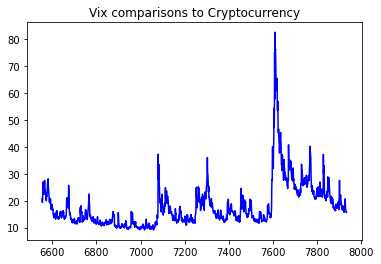

In [190]:
vix_graph = vix_df
vix_graph=vix_graph['Adj Close'].astype(float)
vix_graph.plot(kind='line', x='Date', y= 'Adj Close', color='blue', 
                            fontsize=10, title = 'Vix comparisons to Cryptocurrency')

plt.show()


In [ ]:
vix_agg_data = vix_df.agg(Mean = ('Adj Close', 'mean'),
                          Median = ('Adj Close', 'median'),
                          Mode = ('Adj Close', mode),
                          Variance = ('Adj Close', 'var'),
                          Standard_Deviation = ('Adj Close', 'std'))
vix_agg_data